## Group 5

### Part 1: Dataset Selection and Description

#### Dataset Name: Real World Traffic Volume Forecasting

##### Contextual Description: 
- This dataset provides real-world hourly traffic data collected from the I-94 interstate highway between Minneapolis and St. Paul, Minnesota. It focuses on westbound traffic volume and includes environmental and temporal factors that influence it, such as weather conditions, temperature, precipitation, and holidays. The data spans several years and is suitable for regression tasks to predict traffic congestion or flow based on these real-world conditions. The target variable is 'traffic_volume' (a continuous numerical value representing vehicles per hour), and it has at least three explanatory variables like 'temp' (temperature in Kelvin), 'rain_1h' (rainfall in mm), and 'snow_1h' (snowfall in mm), making it ideal for simple and multiple linear regression analysis.

## Part 2: Problem Formulation

### Analytical Problem Definition
The objective of this analysis is to predict hourly traffic volume on a highway using environmental and weather-related factors. Understanding how variables such as temperature, rainfall, snowfall, and cloud cover influence traffic flow can support better traffic management, congestion prediction, and infrastructure planning.

### Dependent Variable
- **Traffic_Vol**: A continuous numerical variable representing the number of vehicles recorded per hour on the highway.

### Predictor (Independent) Variables
The explanatory variables selected for the regression analysis include:
- **Temperature**: Average ambient temperature measured in Kelvin  
- **Rainfall_last_hour**: Amount of rainfall (in millimeters) recorded in the previous hour  
- **Snowfall_last_hour**: Amount of snowfall (in millimeters) recorded in the previous hour  
- **Cloud_Cover**: Percentage of cloud cover during the hour  

Categorical variables such as **Weather** and **Weather_Desc** are excluded from the linear regression model due to their non-numeric nature.

### Justification for Using Linear Regression
Linear Regression is an appropriate modeling approach for this problem because:
- The dependent variable, **Traffic_Vol**, is continuous and numerical.
- The selected predictor variables are quantitative and are expected to have approximately linear relationships with traffic volume.
- The dataset supports both **Simple Linear Regression** (e.g., modeling Traffic_Vol as a function of Temperature) and **Multiple Linear Regression** (using multiple weather-related predictors).
- Linear Regression provides interpretable results, allowing clear assessment of how individual weather factors influence traffic volume.


EXPLORATORY DATA ANALYSIS

Exploratory Data Analysis (EDA) is conducted to understand the structure, characteristics, and quality of the dataset before model development. This process helps identify patterns, detect missing values, and examine relationships between the response variable and predictor variables.

The analysis focuses on understanding traffic volume behavior and how it relates to environmental and temporal factors such as temperature, rainfall, and snowfall.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load dataset
data = pd.read_csv("train.csv")
data.head()


,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Weather,Weather_Desc,TimeStamp,Date,Traffic_Vol
0,NaN,289.28,0.0,0.0,40,Cloudy skies,Partly cloudy skies,02/10/08 9:00,02/10/08,5555
1,NaN,290.26,0.0,0.0,75,Cloudy skies,Fragmented clouds,02/10/08 10:00,02/10/08,4525
2,NaN,290.28,0.0,0.0,90,Cloudy skies,Full cloud cover,02/10/08 11:00,02/10/08,4772
3,NaN,290.33,0.0,0.0,90,Cloudy skies,Full cloud cover,02/10/08 12:00,02/10/08,5031
4,NaN,292.14,0.0,0.0,75,Cloudy skies,Fragmented clouds,02/10/08 13:00,02/10/08,4928


The initial inspection examines the size of the dataset, column names, and data types to understand the structure of the data and identify numerical and categorical variables.

In [11]:
# Dataset shape
data.shape
# Dataset information
data.info()




<class 'pandas.DataFrame'>
RangeIndex: 38373 entries, 0 to 38372
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Holiday             50 non-null     float64
 1   Temperature         38373 non-null  float64
 2   Rainfall_last_hour  38373 non-null  float64
 3   Snowfall_last_hour  38373 non-null  float64
 4   Cloud_Cover         38373 non-null  int64  
 5   Weather             38373 non-null  str    
 6   Weather_Desc        38373 non-null  str    
 7   TimeStamp           38373 non-null  str    
 8   Date                38373 non-null  str    
 9   Traffic_Vol         38373 non-null  int64  
dtypes: float64(4), int64(2), str(4)
memory usage: 2.9 MB


In [12]:
# Check for missing values
data.isnull().sum()


Holiday               38323
Temperature               0
Rainfall_last_hour        0
Snowfall_last_hour        0
Cloud_Cover               0
Weather                   0
Weather_Desc              0
TimeStamp                 0
Date                      0
Traffic_Vol               0
dtype: int64

There are missing values in the Holiday variable

Descriptive statistics summarize the central tendency and spread of numerical variables, providing insight into typical traffic volume levels and variability in predictors.

In [13]:
# Descriptive statistics for numerical variables
data.describe()


,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Traffic_Vol
count,50.0,38373.000000,38373.000000,38373.000000,38373.000000,38373.000000
mean,1.0,281.152767,0.327486,0.000128,44.821098,3293.947567
std,0.0,13.813324,50.194024,0.005924,38.749566,1988.311540
min,1.0,0.300000,0.000000,0.000000,0.000000,4.000000
25%,1.0,271.910000,0.000000,0.000000,1.000000,1246.000000
50%,1.0,281.990000,0.000000,0.000000,40.000000,3425.000000
75%,1.0,292.140000,0.000000,0.000000,90.000000,4964.000000
max,1.0,310.970000,9831.414286,0.512857,101.000000,7289.000000


From the above data description we can see the mean, standard deviation etc

To explore the relationship for Simple Linear Regression, a scatter plot is used to examine how traffic volume varies with temperature.

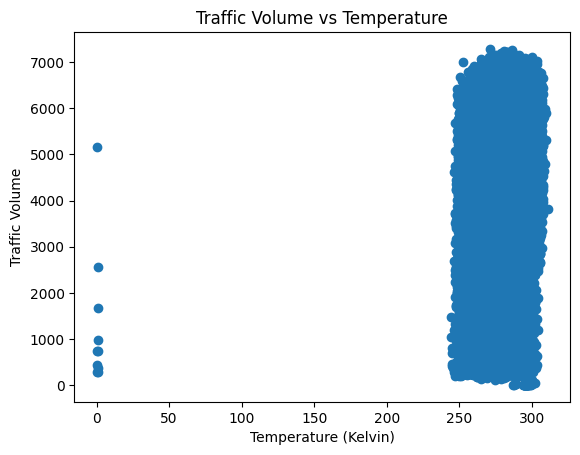

In [14]:
##Scatter plot for simple linear regression
plt.figure()
plt.scatter(data["Temperature"], data["Traffic_Vol"])
plt.xlabel("Temperature (Kelvin)")
plt.ylabel("Traffic Volume")
plt.title("Traffic Volume vs Temperature")
plt.show()


Interpretation:

Relationship appears approximately linear
Higher traffic volumes tend to occur within moderate temperature ranges
Temperature is a reasonable candidate for Simple Linear Regression

Correlation analysis helps identify relationships between numerical predictors and the response variable, and also detects potential multicollinearity.

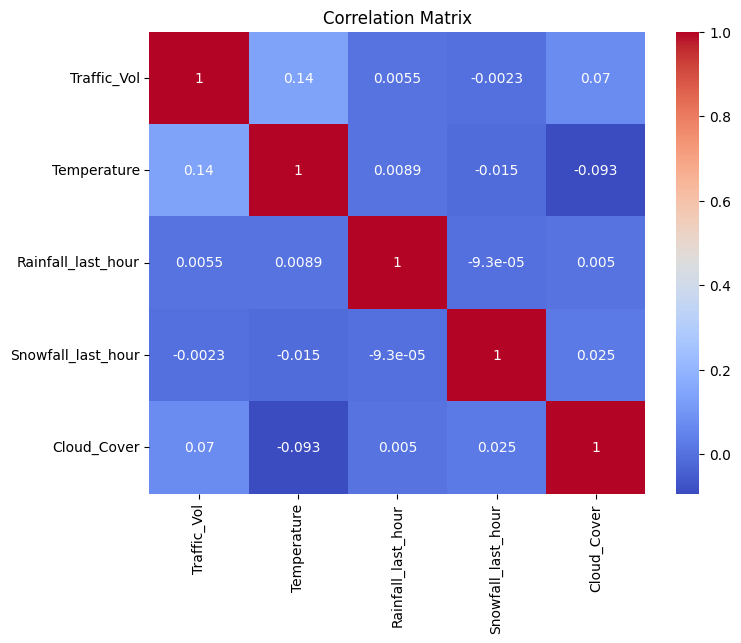

In [15]:
# Select numerical variables
num_df = data[["Traffic_Vol", "Temperature", "Rainfall_last_hour", "Snowfall_last_hour", "Cloud_Cover"]]

# Correlation matrix
corr_matrix = num_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


Interpretation:

Temperature shows moderate correlation with traffic volume
Rain and snow show weaker relationships
No extremely high correlations between predictors, reducing multicollinearity concerns

CONCLUSION OF EDA

Based on the exploratory analysis:
The dataset is suitable for regression analysis
The response variable (traffic_volume) is continuous
Predictor variables show meaningful relationships with traffic volume
The data structure supports both Simple and Multiple Linear Regression